# Project 

## Steps
### 1, Get information from  over-all data  and analysis
### 2, Separate data to  year : 2013, 2014, 2015, 2016, 2017 and implement data visualization tool
### 3, Run hypothesis test

### Actually  this project's goal  is archived in the second step, Step 3  is for more complicated projects



## Step 1 
##### Data preprocessing
information:

1, There are  4  account managers and  35 Client Names, the data is between 2013-10-03 and 2017-09-29, 

2, We only  use the data between 2014 and 2016 because the data in 2013 and 2017 don't contain all months' data.

3, It's  obviously  that October has the most number of customers. The overall percentage is 0.2


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
data = pd.read_excel("file:///Users/qiankunhuang/Desktop/A.xlsx")
data.describe()

,Account manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,2013-10-11 00:00:00
freq,286,38,7
first,NaN,NaN,2013-10-03 00:00:00
last,NaN,NaN,2017-09-29 00:00:00


In [24]:
data['Account manager'].unique()

array([u'Milan Crona', u'Aidan Pouros', u'Chauncey Dach',
       u'Rigoberto White'], dtype=object)

In [25]:
new_data = pd.read_excel("file:///Users/qiankunhuang/Desktop/A.xlsx") 
new_data['Month'] = data['Date of Contact'].map(lambda x:  x.month)
new_data['Year'] = data['Date of Contact'].map(lambda x:  x.year)
new_data['Month-day'] = data['Date of Contact'].map(lambda x:  x.month*100+ x.day)
new_data['day']=data['Date of Contact'].map(lambda x:  x.day)
new_data = new_data[new_data['Year'] <= 2016]
new_data = new_data[new_data['Year'] >= 2014]
new_data.head()

,Account manager,Client Name,Date of Contact,Month,Year,Month-day,day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,10,2015,1031,31
5,Chauncey Dach,Abbott Group,2016-03-21,3,2016,321,21
7,Rigoberto White,"Fahey, Wunsch and Bashirian",2016-05-14,5,2016,514,14
8,Rigoberto White,Bosco-Ortiz,2014-07-14,7,2014,714,14
9,Rigoberto White,Ondricka-Wolff,2015-10-14,10,2015,1014,14


In [26]:
All = new_data.groupby('Month').count()
All['Client Name']

Month
1      48
2      50
3      45
4      40
5      53
6      61
7      52
8      60
9      90
10    153
11     46
12     57
Name: Client Name, dtype: int64

In [27]:
All['Client Name'].idxmax()

10

In [28]:
All['perc'] = All['Client Name']/All['Client Name'].sum()
All['perc']

Month
1     0.063576
2     0.066225
3     0.059603
4     0.052980
5     0.070199
6     0.080795
7     0.068874
8     0.079470
9     0.119205
10    0.202649
11    0.060927
12    0.075497
Name: perc, dtype: float64

## Step 2  

#### Data visualization
Separate data to each year : 2013, 2014, 2015, 2016, 2017 and implement data visualization tool
It's obviously that october is the best year to contact customers for 2014, 2015 and 2016.

1, The first graph shows the distribution between month and the number of customers. 

2, The second graph shows that  October is far above the 0.75 Quartiles.



In [29]:
data_2014 = new_data[new_data['Year']==2014]
data_2014 = data_2014.groupby('Month').count()
print 'The best month to contact customers in 2014 was ' + str(data_2014['Client Name'].idxmax())


The best month to contact customers in 2014 was 10


In [30]:
data_2015 = new_data[new_data['Year']==2015]
data_2015 = data_2015.groupby('Month').count()
print 'The best month to contact customers in 2015 was ' + str(data_2015['Client Name'].idxmax())

The best month to contact customers in 2015 was 10


In [31]:
data_2016 = new_data[new_data['Year']==2016]
data_2016 = data_2016.groupby('Month').count()
print 'The best month to contact customers in 2016 was ' + str(data_2016['Client Name'].idxmax())

The best month to contact customers in 2016 was 10


<IPython.core.display.Javascript object>


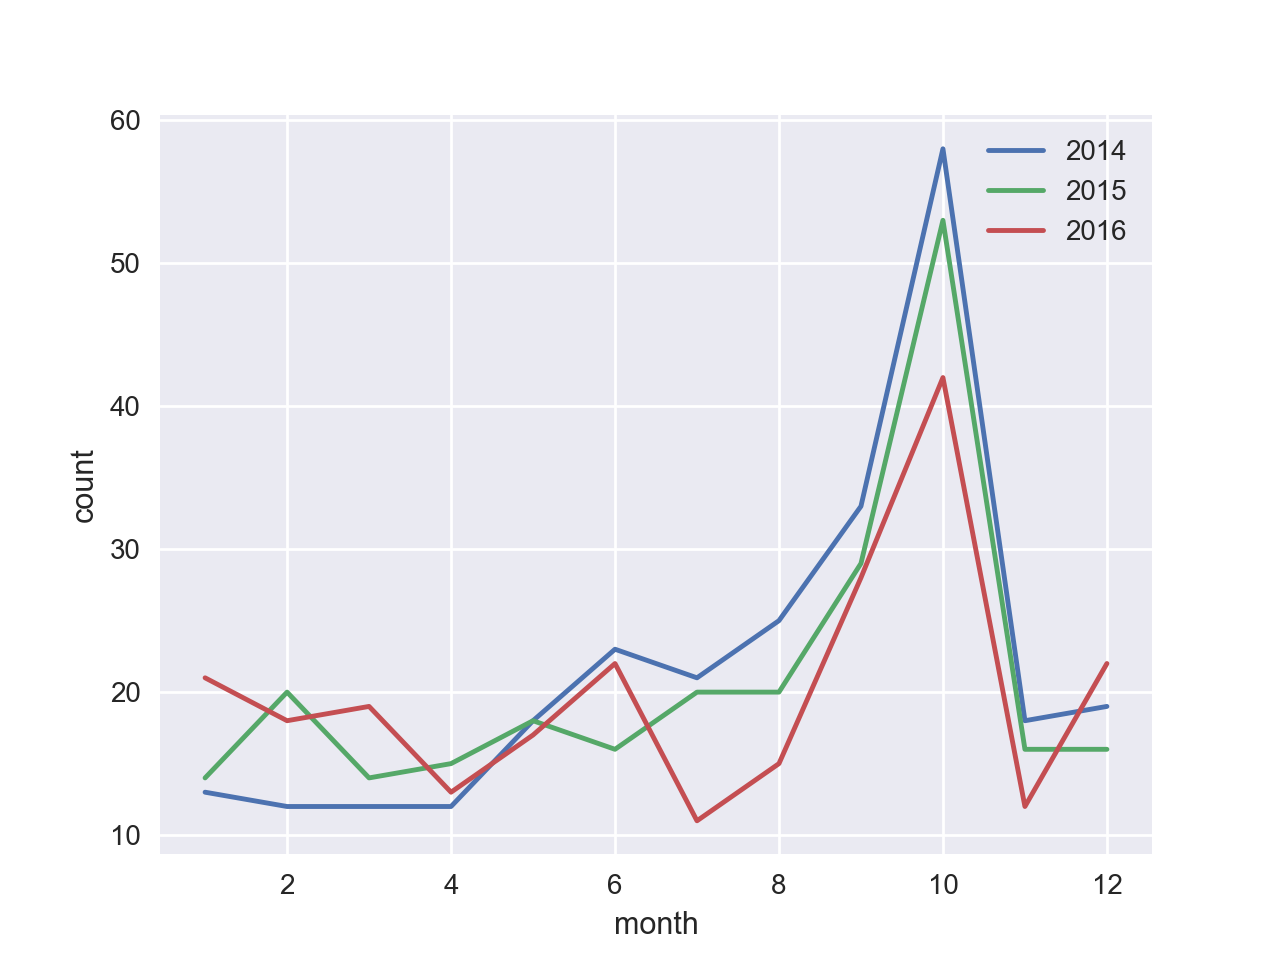

In [37]:
plt.figure()
data_2015 = new_data[new_data['Year']==2015]
data_2015 = data_2015.groupby('Month').count()
data_2015['Client Name'].idxmax()
plt.plot(data_2014['Client Name'],label='2014')
plt.plot(data_2015['Client Name'],label='2015')
plt.plot(data_2016['Client Name'],label='2016')
plt.gca().set_ylabel('count')
plt.gca().set_xlabel('month')
plt.legend()


<IPython.core.display.Javascript object>


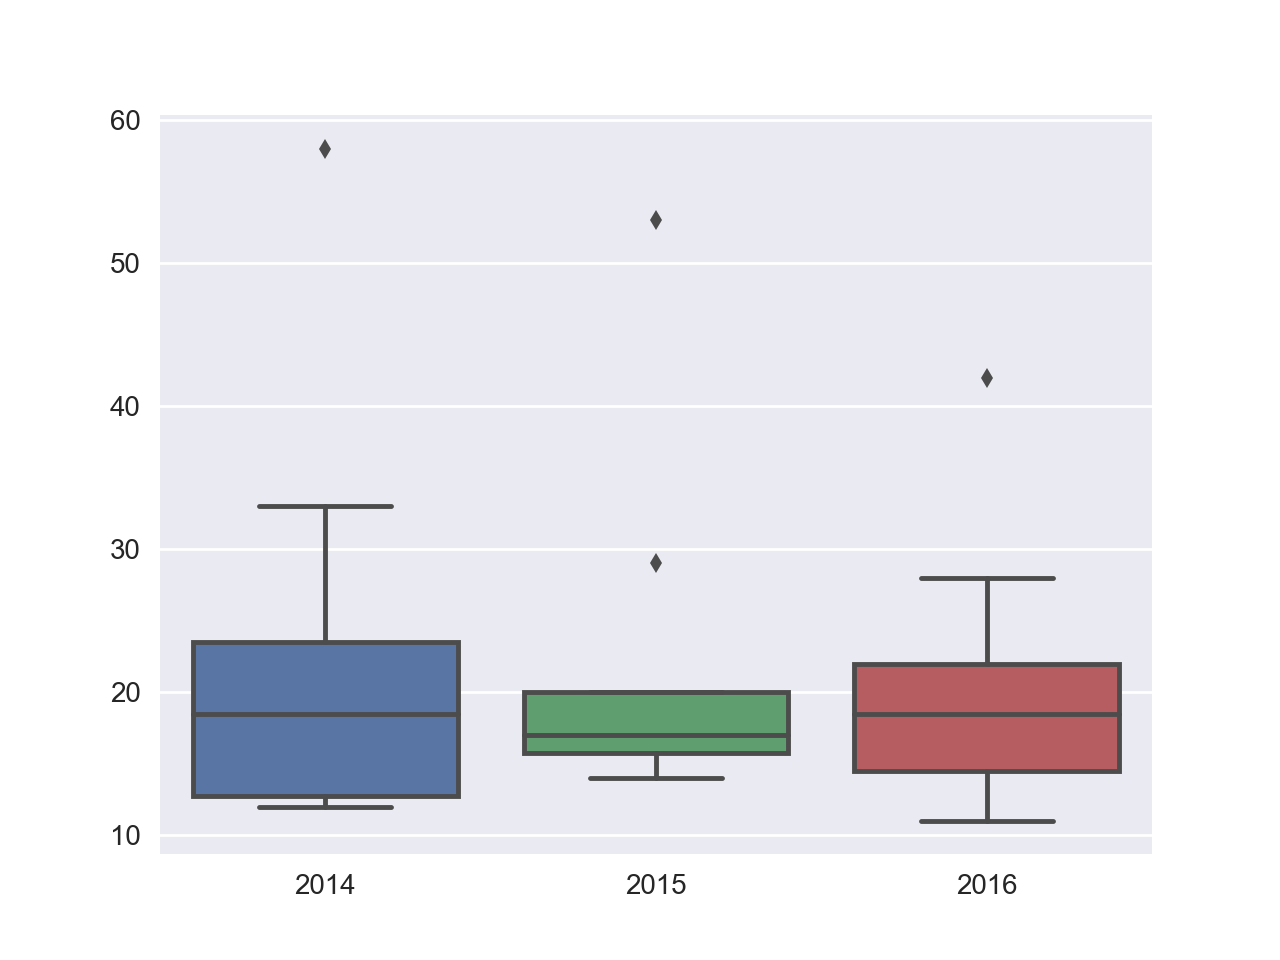

In [33]:
plt.figure()
df = pd.DataFrame({'2014':data_2014['Client Name'],
                   '2015':data_2015['Client Name'],
                   '2016':data_2016['Client Name']})
sns.boxplot(df)

## Step 3
#### hypothesis test
This step isn't neccerary for this project and I try to analysis the data reliabiity.

Assumption: 

Two consequent years' data should be similar. They should have the similar mean.

Hypothesis: 

2014.mean  is equal to 2015.mean , mean(2014's customer) = mean(2015's customer)

H0:
mean(2014's customers) = mean(2015's customers)

H1:
mean(2014's customers) != mean(2015's customers)


result:

p>0.05,  accept H0. The assumption is correct.



### warning:(more statistic) 
According to the data visualization graph , it doesn't follow a normal distribution and we don't have enough data. Actually bootstrap is a better way than t-test to do the  hypothesis test. However, I still use t-test for this data because it's more convenient and easier to be understood.

In [34]:
from scipy import stats
stats.ttest_ind

<function scipy.stats.stats.ttest_ind>

In [35]:
stats.ttest_ind(df['2014'], df['2015'])


Ttest_indResult(statistic=0.22145219395600901, pvalue=0.82678295065974794)

In [36]:
stats.ttest_ind(df['2015'], df['2016'])

Ttest_indResult(statistic=0.22987979790165344, pvalue=0.82030911150850505)

## Next step:
### If I have enough data and features , I could try some machine learning models like neural network , random forest regression tree to predict the number of custmoers in the future. Besides, I can also create a recommendation system for customers based on ALS algorithm.